![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [67]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [68]:
# Loading Men's and Women's Dataset
men = pd.read_csv('men_results.csv')
women = pd.read_csv('women_results.csv')

In [69]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [70]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [71]:
# Filter the data for the time range and tournament
men['date'] = pd.to_datetime(men['date'])
men_subset = men[(men['date'] > '2002-01-02') & (men['tournament'].isin(['FIFA World Cup']))]
women['date'] = pd.to_datetime(women['date'])
women_subset = women[(women['date'] > '2002-01-02') & (women['tournament'].isin(['FIFA World Cup']))]

In [72]:
# Inspecting Men's and Women's Dataframes
print(men_subset.head(5))
print(women_subset.head(5))

       Unnamed: 0       date  ... away_score      tournament
25164       25164 2002-05-31  ...          1  FIFA World Cup
25165       25165 2002-06-01  ...          0  FIFA World Cup
25166       25166 2002-06-01  ...          1  FIFA World Cup
25167       25167 2002-06-01  ...          2  FIFA World Cup
25168       25168 2002-06-02  ...          0  FIFA World Cup

[5 rows x 7 columns]
      Unnamed: 0       date  ... away_score      tournament
1600        1600 2003-09-20  ...          3  FIFA World Cup
1601        1601 2003-09-20  ...          0  FIFA World Cup
1602        1602 2003-09-20  ...          1  FIFA World Cup
1603        1603 2003-09-20  ...          0  FIFA World Cup
1604        1604 2003-09-21  ...          1  FIFA World Cup

[5 rows x 7 columns]


In [73]:
# Create group and goals_scored column
men_subset['group'] = 'men'
women_subset['group'] = 'women'
men_subset['goals_scored'] = men_subset['home_score'] + men_subset['away_score']
women_subset['goals_scored'] = women_subset['home_score'] + women_subset['away_score']
men_subset.head()
women_subset.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


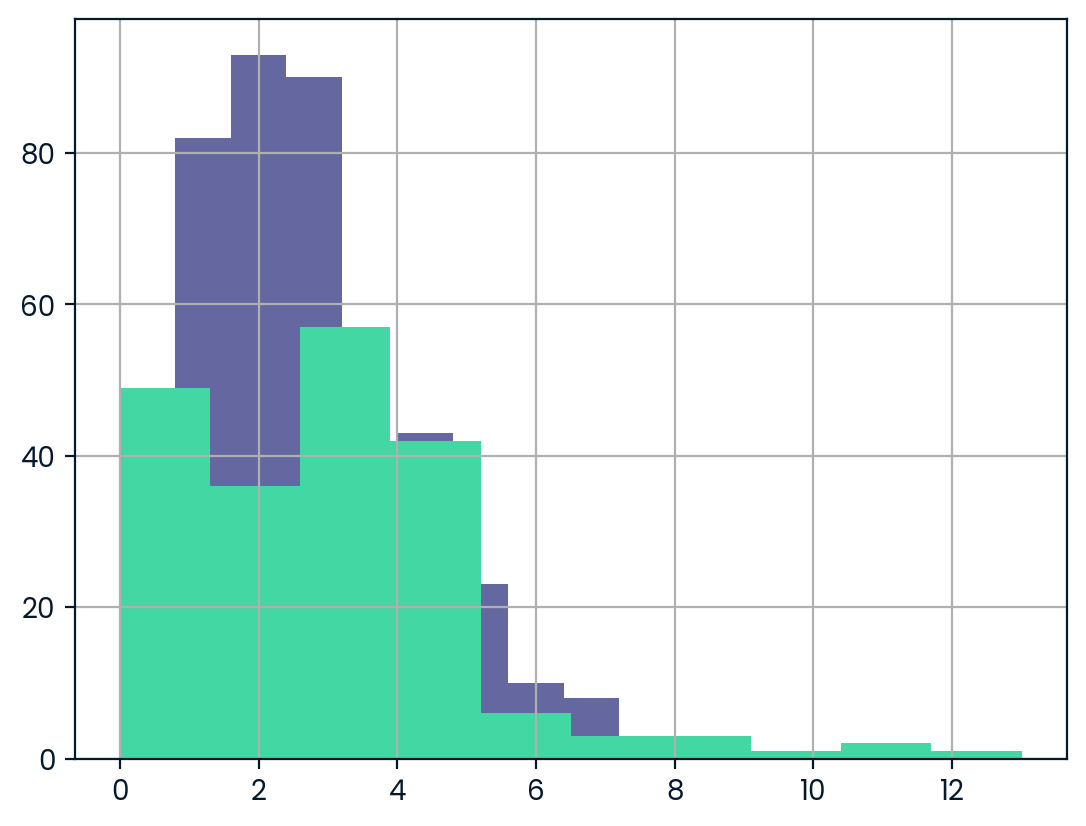

<Figure size 640x480 with 0 Axes>

In [74]:
# Determine normality using histogram
men_subset['goals_scored'].hist()
women_subset['goals_scored'].hist()
plt.show()
plt.clf()

# Goals scores is not normally distribured, so use Wilcoxon-Mann-Whitney test of two groups

In [75]:
# Combine Women's and Men's data and calculate goals score in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)
both.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
0,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
2,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
3,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
4,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


In [76]:
# Transform the data for the Pingouin Mann-Whitney U t-test/Wilcoxon Mann Whitney Test
both_subset = both[['goals_scored', 'group']]
both_subset_wide = both_subset.pivot(columns='group', values='goals_scored')
print(both_subset)
print(both_subset_wide)

     goals_scored  group
0               3  women
1               2  women
2               5  women
3               6  women
4               4  women
..            ...    ...
579             3    men
580             3    men
581             2    men
582             3    men
583             6    men

[584 rows x 2 columns]
group  men  women
0      NaN    3.0
1      NaN    2.0
2      NaN    5.0
3      NaN    6.0
4      NaN    4.0
..     ...    ...
579    3.0    NaN
580    3.0    NaN
581    2.0    NaN
582    3.0    NaN
583    6.0    NaN

[584 rows x 2 columns]


In [77]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with Scipy
results_scipy = mannwhitneyu(
    x=women_subset['goals_scored'],
    y=men_subset['goals_scored'],
    alternative='greater'
)
print(results_scipy)


MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)


In [78]:
p_val = results_scipy.pvalue

In [79]:
# Determine Hypothesis test result using significance levels
if p_val < 0.01:
    result = 'reject'
else:
    result = 'fail to reject'

result_dict = {'p_val': p_val, 'result': result}

In [80]:
# Results
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
